### Student Information
Name: 詹宸安

Student ID: 111502528

GitHub ID: AnaAngle

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_X). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the X Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the X preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Begin Assignment Here
import pandas as pd
X = pd.read_csv("./Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
X

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [3]:
#看看比例
X['sentiment'].value_counts()

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64

In [4]:
#轉成標籤
X['sentiment'] = X['sentiment'].apply(lambda x: 1 if x=='nostalgia' else 0)
X['sentiment']

0       0
1       1
2       1
3       0
4       1
       ..
1495    0
1496    0
1497    0
1498    1
1499    1
Name: sentiment, Length: 1500, dtype: int64

In [5]:
X.isnull().any(axis=0)
#看來沒有null值

sentiment    False
comment      False
dtype: bool

In [6]:
#丟掉重複
X.drop_duplicates(keep=False, inplace=True)

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

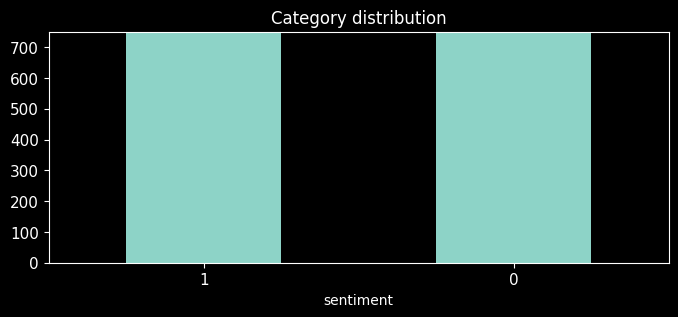

In [7]:
import matplotlib.pyplot as plt

X['sentiment'].value_counts()
#看一下現在的資料如何
plt.style.use('dark_background')
X['sentiment'].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 750],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [8]:
import helpers.data_mining_helpers as dmh
import nltk

In [9]:
#tokenize
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [10]:
X['unigrams']

0       [He, was, a, singer, with, a, golden, voice, t...
1       [The, mist, beautiful, voice, ever, I, listene...
2       [I, have, most, of, Mr., Reeves, songs, ., Alw...
3       [30, day, leave, from, 1st, tour, in, Viet, Na...
4       [listening, to, his, songs, reminds, me, of, m...
                              ...                        
1495    [i, do, n't, know, !, .., but, the, opening, o...
1496    [it, 's, sad, this, is, such, a, beautiful, so...
1497    [Dear, Friend, ,, I, think, age, and, time, is...
1498    [I, was, born, in, 1954, and, started, to, be,...
1499    [This, is, the, first, CD, I, bought, after, m...
Name: unigrams, Length: 1498, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
#產出Vector
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['comment']) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [12]:
count_vect.get_feature_names_out()[:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [13]:
import numpy as np
import seaborn as sns
#來看看常見的10個term
term_sorted = np.argsort(X_counts.sum(axis=0).A1)
count_vect.get_feature_names_out()[term_sorted[:15]]

array(['00', 'masculine', 'massively', 'master', 'masterpieces',
       'masters', 'matched', 'mate', 'marvin', 'material', 'matters',
       'mcdonald', 'measure', 'medal', 'mederios'], dtype=object)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'term_when'),
  Text(1.5, 0, 'term_from'),
  Text(2.5, 0, 'term_it'),
  Text(3.5, 0, 'term_jim'),
  Text(4.5, 0, 'term_singer'),
  Text(5.5, 0, 'term_reeves'),
  Text(6.5, 0, 'term_always'),
  Text(7.5, 0, 'term_years'),
  Text(8.5, 0, 'term_love'),
  Text(9.5, 0, 'term_will')])

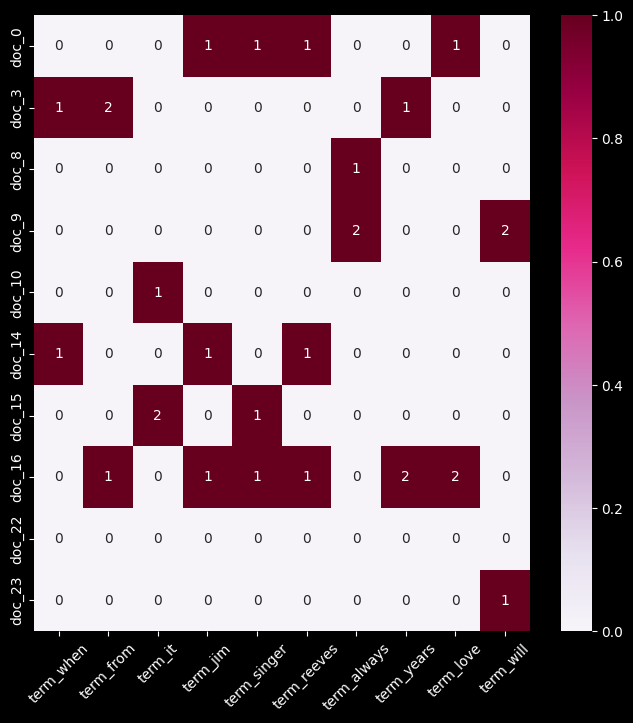

In [14]:
#用heatmap比較好觀察，先用這個來看看not nostalgia
indice1 = X.loc[X['sentiment']==0].index[:10]
indice2 = X.loc[X['sentiment']==1].index[:10]

high_freq_indice1 = np.argsort(X_counts[indice1, :].sum(axis=0).A1)[-35:-25]
high_freq_indice2 = np.argsort(X_counts[indice2, :].sum(axis=0).A1)[-35:-25]

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[high_freq_indice1]]
plot_y = ["doc_"+ str(i) for i in indice1]
plot_z = X_counts[indice1, :][:, high_freq_indice1].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'term_cry'),
  Text(1.5, 0, 'term_47'),
  Text(2.5, 0, 'term_he'),
  Text(3.5, 0, 'term_an'),
  Text(4.5, 0, 'term_song'),
  Text(5.5, 0, 'term_still'),
  Text(6.5, 0, 'term_listening'),
  Text(7.5, 0, 'term_like'),
  Text(8.5, 0, 'term_love'),
  Text(9.5, 0, 'term_am')])

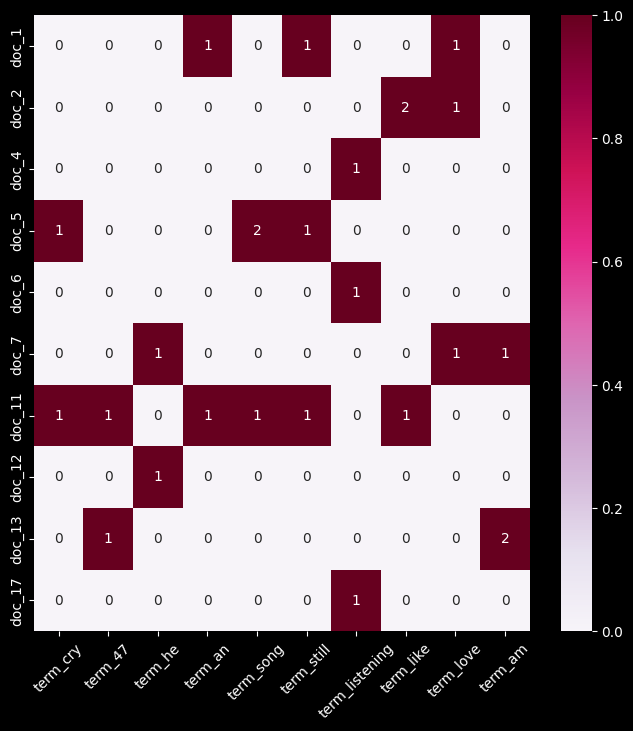

In [15]:
#這是nostalgia的部分
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[high_freq_indice2]]
plot_y = ["doc_"+ str(i) for i in indice2]
plot_z = X_counts[indice2, :][:, high_freq_indice2].toarray()
df_todraw2 = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df_todraw2, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.xticks(rotation=45)

C:\Users\Zhz\AppData\Local\Temp\ipykernel_1544\436847489.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out(), rotation=90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

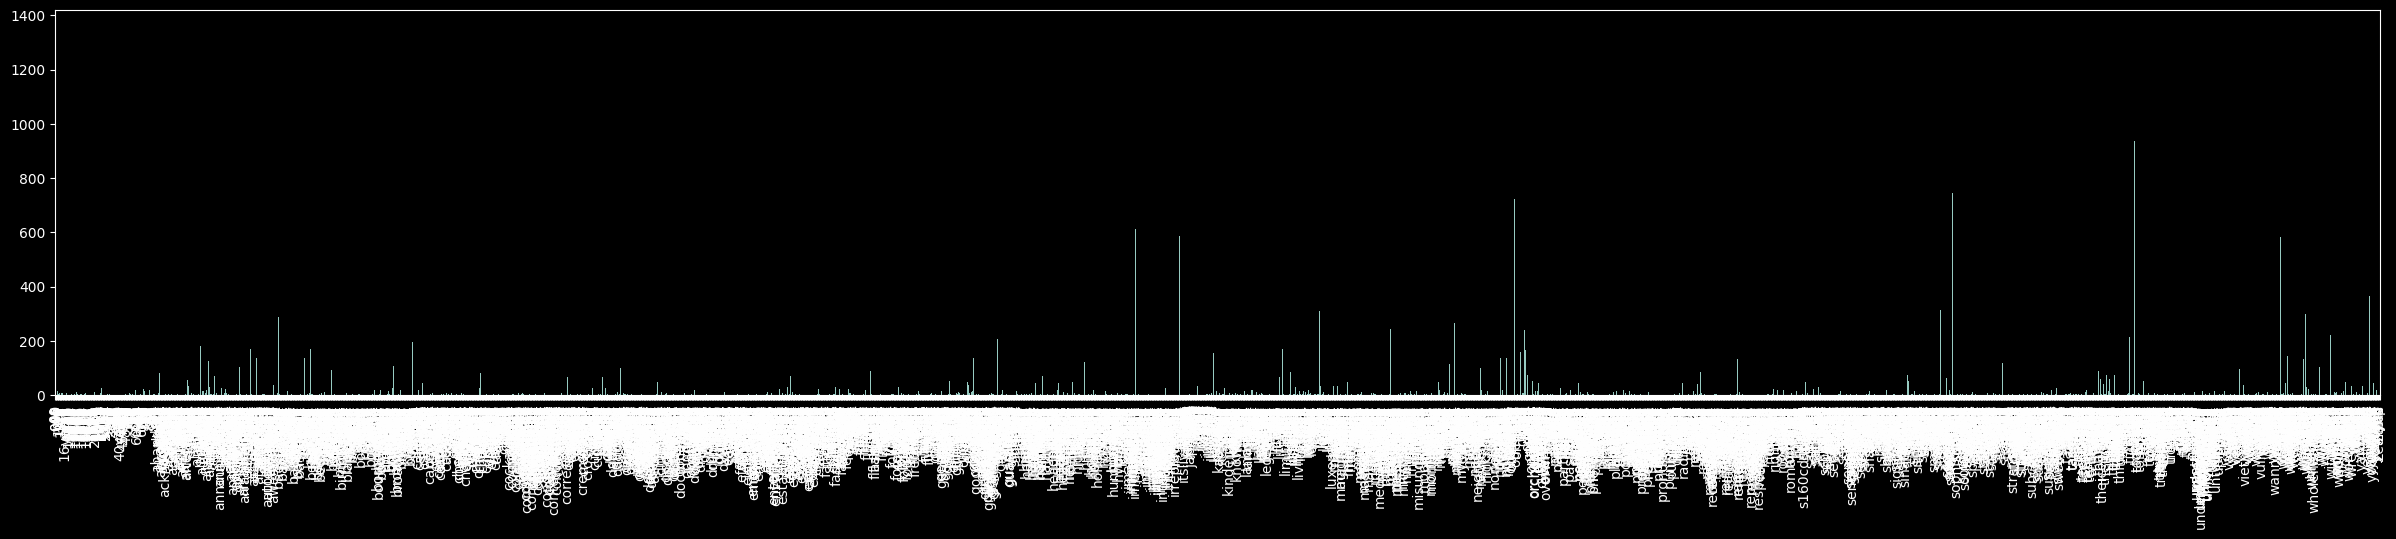

In [16]:
#來看看各個term的數量
term_frequencies = X_counts[:, :].sum(axis=0).A1
freq_indice = np.arange(len(term_frequencies))

plt.figure(figsize=(30, 5))
g = sns.barplot(x=count_vect.get_feature_names_out(), 
                y=term_frequencies)
g.set_xticklabels(count_vect.get_feature_names_out(), rotation=90)

C:\Users\Zhz\AppData\Local\Temp\ipykernel_1544\1648335557.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[freq_indice2], rotation=20)


[Text(0, 0, 'success'),
 Text(1, 0, 'vibes'),
 Text(2, 0, 'cruise'),
 Text(3, 0, 'file'),
 Text(4, 0, 'enchanced'),
 Text(5, 0, 'ed'),
 Text(6, 0, 'stage'),
 Text(7, 0, 'high'),
 Text(8, 0, 'millennium'),
 Text(9, 0, 'bkk'),
 Text(10, 0, 'faith'),
 Text(11, 0, 'attraction'),
 Text(12, 0, 'got'),
 Text(13, 0, 'melody'),
 Text(14, 0, 'underrated'),
 Text(15, 0, 'style'),
 Text(16, 0, 'shine'),
 Text(17, 0, '60th'),
 Text(18, 0, 'house'),
 Text(19, 0, 'transplant')]

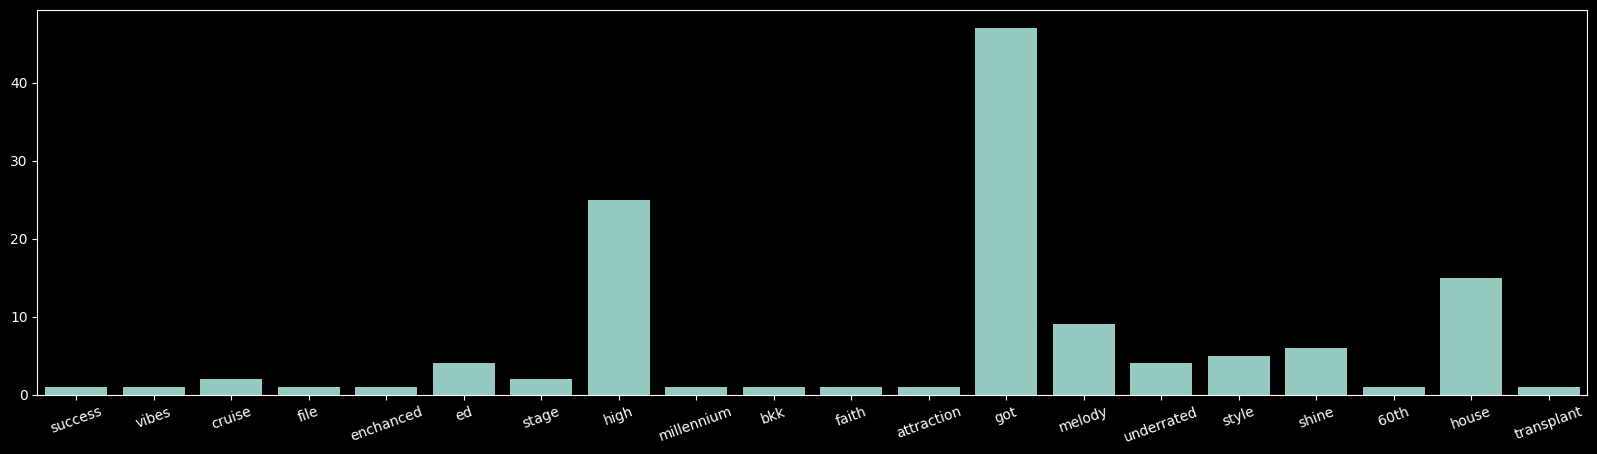

In [17]:
#有點多，縮減一下
np.random.seed(42)
freq_indice2 = np.random.randint(0, len(term_frequencies), (20))

plt.figure(figsize=(20, 5))
g = sns.barplot(x=count_vect.get_feature_names_out()[freq_indice2], 
                y=term_frequencies[freq_indice2])
g.set_xticklabels(count_vect.get_feature_names_out()[freq_indice2], rotation=20)

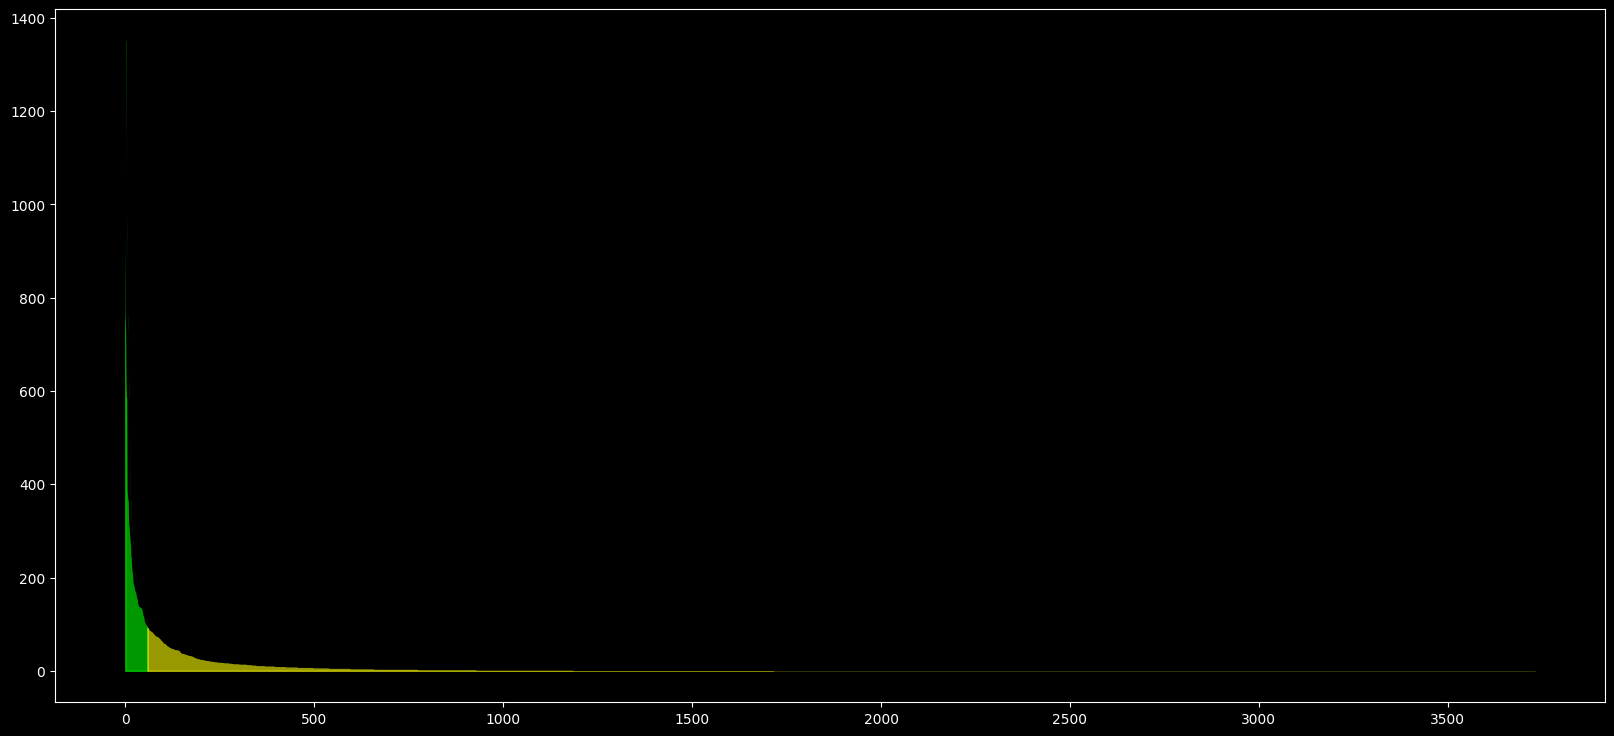

In [18]:
#看一下長尾圖（long tail）

y = np.sort(term_frequencies)[::-1]
x = np.arange(0, len(y))

plt.figure(figsize=(20, 9))
plt.plot(x, y, color='black', linewidth=2)

plt.fill_between(x, y, where=(y > 100), color="lime", alpha=0.6)
plt.fill_between(x, y, where=(y <= 100), color="yellow", alpha=0.6)

C:\Users\Zhz\AppData\Local\Temp\ipykernel_1544\2504359192.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out(), rotation=90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

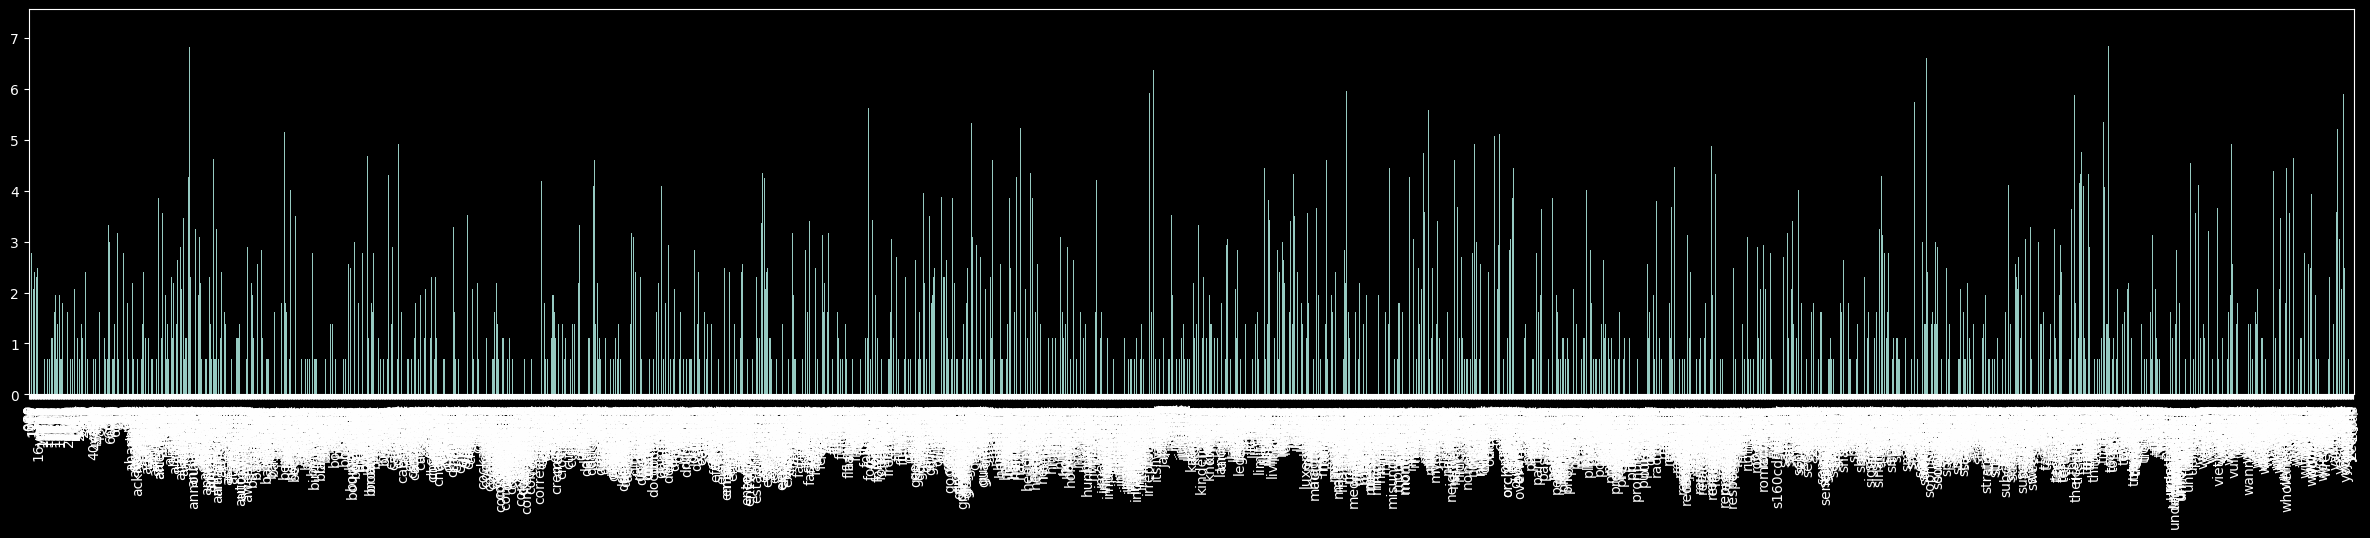

In [19]:
#log之後試試看
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.figure(figsize=(30, 5))
g = sns.barplot(x=count_vect.get_feature_names_out(), 
                y=term_frequencies_log)
g.set_xticklabels(count_vect.get_feature_names_out(), rotation=90)

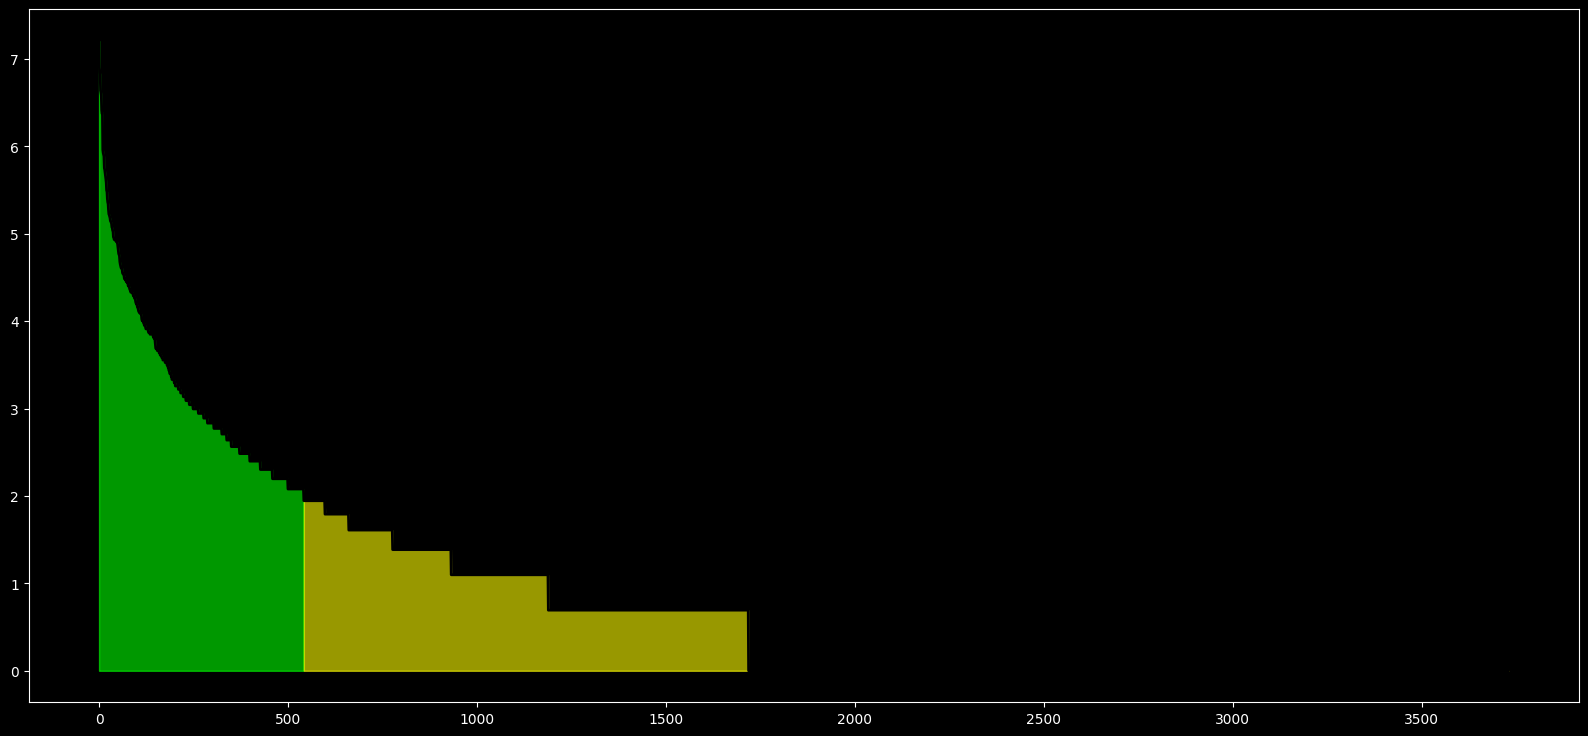

In [20]:
# long tail圖再一次
y = np.sort(term_frequencies_log)[::-1]
x = np.arange(0, len(y))

plt.figure(figsize=(20, 9))
plt.plot(x, y, color='black', linewidth=2)

plt.fill_between(x, y, where=(y > 2), color="lime", alpha=0.6)
plt.fill_between(x, y, where=(y <= 2), color="yellow", alpha=0.6)

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

category_dfs = {}

category_dfs['not nostalgic'] = X[X['sentiment'] == 0].copy()
category_dfs['nostalgic'] = X[X['sentiment'] == 1].copy()


def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['comment'])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df

term_document_dfs = {}

term_document_dfs['not nostalgic'] = create_term_document_df(category_dfs['not nostalgic'])
term_document_dfs['nostalgic'] = create_term_document_df(category_dfs['nostalgic'])

In [22]:
print(f"Filtered Term-Document Frequency DataFrame for Category not nostalgic:")
term_document_dfs['not nostalgic']

Filtered Term-Document Frequency DataFrame for Category not nostalgic:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


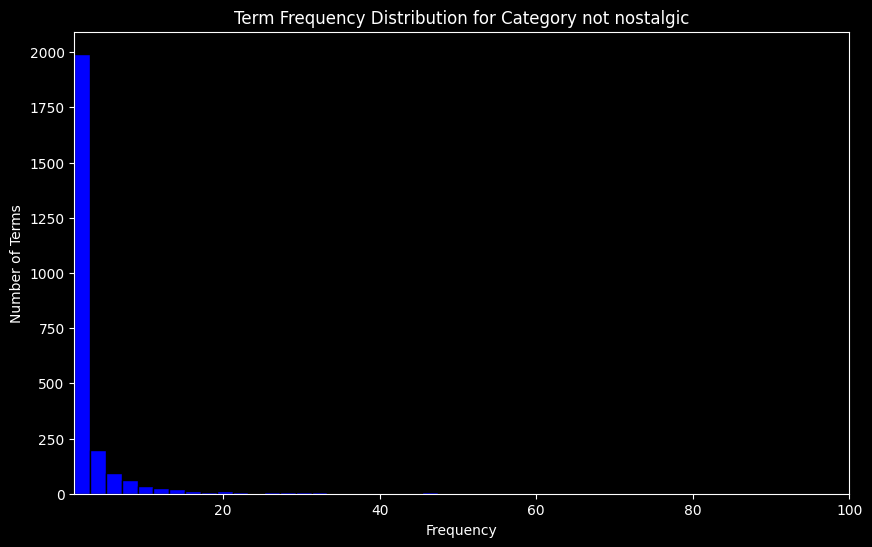

In [23]:
word_counts = term_document_dfs['not nostalgic'].sum(axis=0).to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=350, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category not nostalgic')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.show()

In [24]:
word_counts = term_document_dfs['not nostalgic'].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: not nostalgic")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgic
Number of terms in top 5%: 130
Filtered terms: ['00', 'graphics', 'granted', 'grannys', 'grandsons', 'grandma', 'grandfathers', 'grandchildren', 'grandchild', 'gramaphone', 'graffiti', 'grade', 'great', 'grace', 'got', 'goosebumps', 'goodnight', 'goodness', 'gone', 'gold', 'going', 'goes', 'glitter', 'glimpses', 'glass', 'grabbed', 'glasgow', 'greater', 'greats', 'happiest', 'happening', 'happened', 'hansen', 'hanging', 'hanged', 'hang', 'handball', 'hand', 'hall', 'hadn', 'greatest', 'guy', 'gulf', 'guitarist', 'guess', 'guardhouse', 'guaranteed', 'growing', 'group', 'grocery', 'griffiths', 'greg', 'green', 'gut', 'glad', 'giving', 'gives', 'fresh', 'freedom', 'free', 'francisco', 'frames', 'found', 'fossils', 'forwards', 'forward', 'form', 'fork', 'front', 'forgive', 'ford', 'for', 'fool', 'following', 'follow', 'flying', 'floyd', 'flowing', 'flower', 'flowed', 'florida', 'forehead', 'fulfill', 'fully', 'funerals', 'given', 'give', 'gift', 'gf', 'gets', 'germa

In [25]:
word_counts = term_document_dfs['nostalgic'].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Category: nostalgic")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgic
Number of terms in bottom 1%: 22
Filtered terms: ['nicer', 'dc', 'if', 'ignore', 'ill', 'david', 'illicit', 'im', 'idea', 'images', 'imho', 'imitated', 'immediately', 'impeccable', 'impersonate', 'dark', 'impossible', 'imagine', 'deal', 'dean', 'iconized', 'hum']


In [26]:
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # (default) Get the words to remove from the top 5% and bottom 1% 
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

In [27]:
mid_term_document_dfs, head_term_document_dfs, tail_term_document_dfs = {}, {}, {}
for category in ['not nostalgic', 'nostalgic']:
    # 保留40%~60%
    mid_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category], top_percent=0.45, bottom_percent=0.45)
    
    # 保留前10%
    head_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category], top_percent=0, bottom_percent=0.9)
    
    # 保留後10%
    tail_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category], top_percent=0.9, bottom_percent=0)

    print(f"----------Category: {category}----------\n")
    print(f"Total {len(term_document_dfs[category])} term(s)\n")
    print("Term of Mid DataFrame:")
    print(mid_term_document_dfs[category].columns, end='\n\n')
    print("Term of Head DataFrame:")
    print(head_term_document_dfs[category].columns, end='\n\n')
    print("Term of Tail DataFrame:")
    print(tail_term_document_dfs[category].columns, end='\n\n')

----------Category: not nostalgic----------

Total 748 term(s)

Term of Mid DataFrame:
Index(['045', '10m', '12', '16years', '17th', '1930', '1930s', '1952', '1955',
       '1957',
       ...
       'finished', 'fire', 'fires', 'fixed', 'flat', 'florida', 'flowed',
       'flower', 'flowing', 'zulus'],
      dtype='object', length=262)

Term of Head DataFrame:
Index(['about', 'after', 'again', 'age', 'ago', 'all', 'always', 'am',
       'amazing', 'an',
       ...
       'world', 'would', 'wow', 'wrong', 'years', 'yes', 'you', 'young',
       'your', 'youtube'],
      dtype='object', length=261)

Term of Tail DataFrame:
Index(['00', 'guaranteed', 'gucci', 'guessing', 'guitarist', 'gun', 'gut',
       'ha', 'haired', 'handedly',
       ...
       'princess', 'princilla', 'principle', 'priscilla', 'privilege',
       'prodigy', 'produce', 'production', 'prof', 'profane'],
      dtype='object', length=261)

----------Category: nostalgic----------

Total 750 term(s)

Term of Mid DataFrame:

In [28]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 748
Number of items : 2602
Minimum Transaction Size : 4
Average Transaction Size : 20.060160427807485
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.370044579132406
Variance in Transaction Sizes : 107.68178417770905
Sparsity : 0.9922904840784752


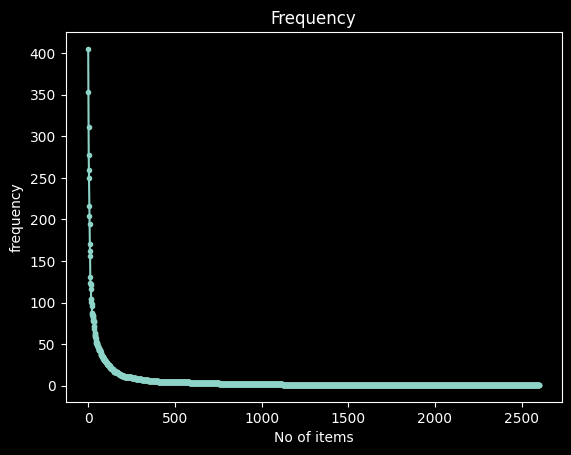

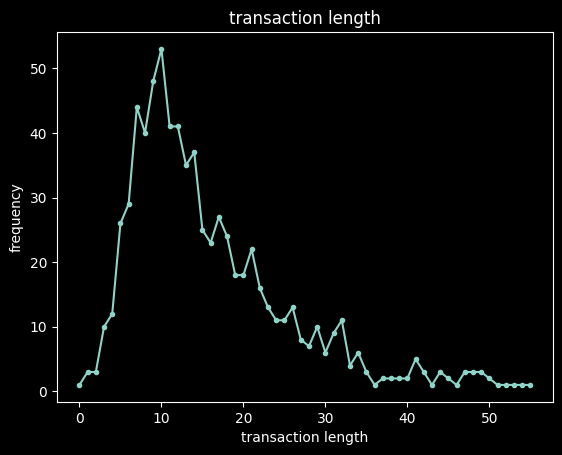

In [30]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgic.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 750
Number of items : 2295
Minimum Transaction Size : 3
Average Transaction Size : 21.644
Maximum Transaction Size : 70
Standard Deviation Transaction Size : 13.110095245013795
Variance in Transaction Sizes : 172.1040694259012
Sparsity : 0.9905690631808279


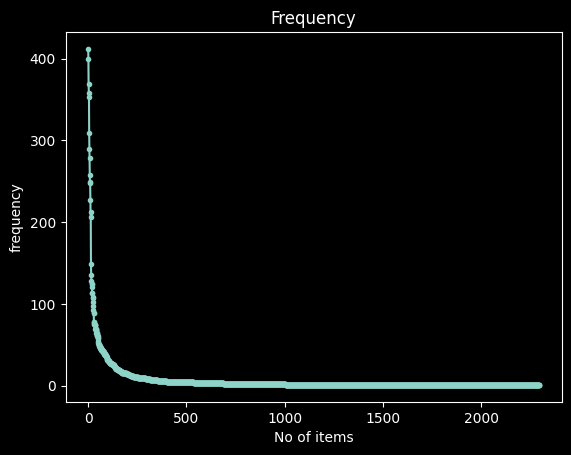

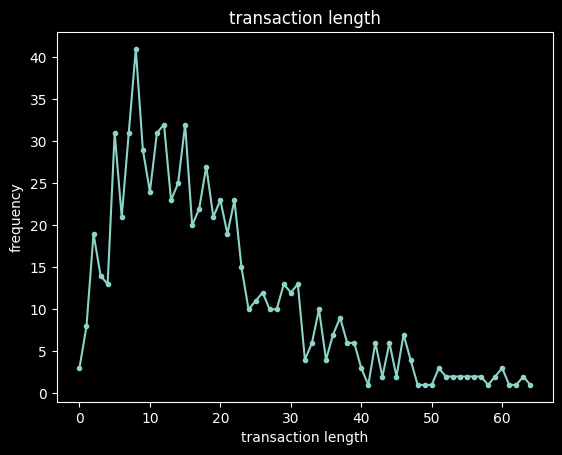

In [31]:
obj = tds.TransactionalDatabase('td_freq_db_nostalgic.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [39]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
from sklearn.model_selection import train_test_split
#分割訓練資料
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, X['sentiment'], test_size=0.2, random_state=42)

In [41]:
from sklearn.naive_bayes import MultinomialNB
#訓練模型
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [42]:
from sklearn.metrics import accuracy_score, classification_report
#評估模型
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Model Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       152
           1       0.80      0.95      0.87       148

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



In [45]:
new_comments = ["The plot of this movie is very intense, and the visual effects are impressive"]

# 將新評論轉換為詞頻矩陣
new_counts = count_vect.transform(new_comments)

# 將詞頻矩陣轉換為 TF-IDF
new_tfidf = tfidf_transformer.transform(new_counts)

# 進行預測
new_pred = nb_classifier.predict(new_tfidf)
print(f"Prediction for new comment: {new_pred[0]}")

Prediction for new comment: 0
